Test accuracy: 0.9333986287952988
Classification report:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93       395
           1       1.00      1.00      1.00       161
           2       0.93      0.95      0.94       479
           3       0.92      0.92      0.92      1043
           4       0.97      0.96      0.97       588
           5       0.96      0.95      0.96       619
           6       0.88      0.90      0.89       799

    accuracy                           0.93      4084
   macro avg       0.94      0.94      0.94      4084
weighted avg       0.93      0.93      0.93      4084



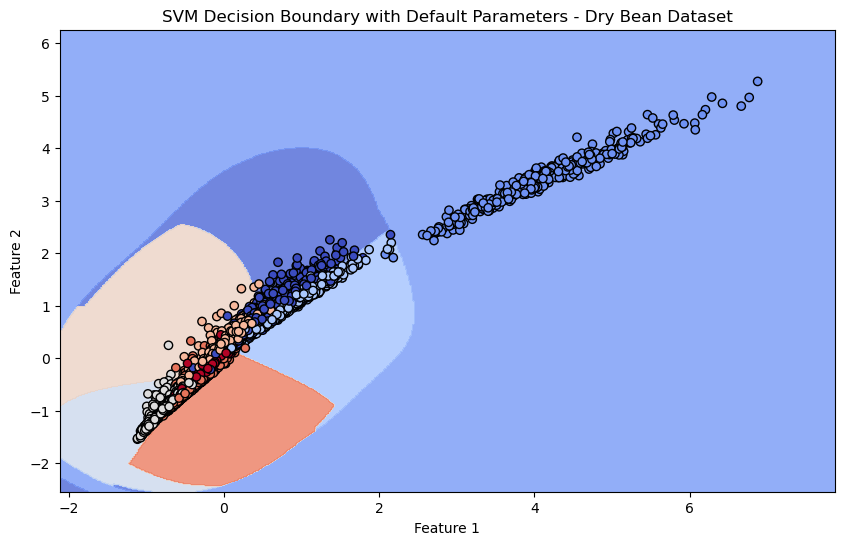

Test accuracy: 0.8703703703703703
Classification report:
               precision    recall  f1-score   support

           0       0.87      0.86      0.86       129
           1       0.87      0.88      0.88       141

    accuracy                           0.87       270
   macro avg       0.87      0.87      0.87       270
weighted avg       0.87      0.87      0.87       270



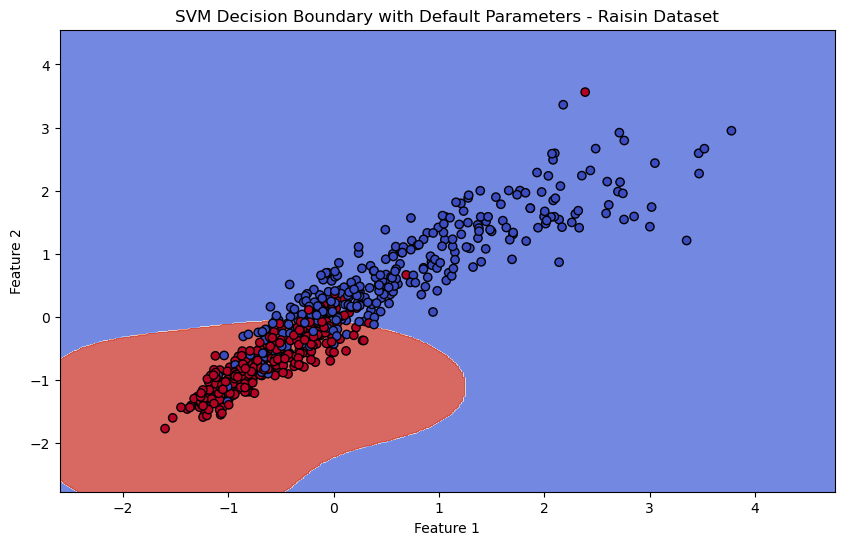

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load data
def load_data(url):
    return pd.read_csv(url)

dry_bean_data = load_data("Dry_Bean_Dataset.csv")
raisin_data = load_data("Raisin_Dataset.csv")

# Preprocess data
def preprocess_data(data, target_column):
    if data[target_column].dtype == 'object':
        encoder = LabelEncoder()
        data[target_column] = encoder.fit_transform(data[target_column])

    X = data.drop(columns=[target_column])
    y = data[target_column]
    
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    
    return train_test_split(X, y, test_size=0.3, random_state=42)

X_train_dry, X_test_dry, y_train_dry, y_test_dry = preprocess_data(dry_bean_data, 'Class')
X_train_rais, X_test_rais, y_train_rais, y_test_rais = preprocess_data(raisin_data, 'Class')

# Train and evaluate SVM model
def train_and_evaluate_svm(X_train, y_train, X_test, y_test):
    # Create SVM model with default parameters
    model = SVC()
    model.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print("Test accuracy:", acc)
    print("Classification report:\n", classification_report(y_test, y_pred))
    
    return model

# Plot SVM decision boundary
def plot_svm(X_train, y_train, X_test, y_test, model, dataset_name):
    plt.figure(figsize=(10, 6))
    
    # Reduce dimensions to 2D for plotting
    if X_train.shape[1] > 2:
        X_train_plot = X_train[:, :2]
        X_test_plot = X_test[:, :2]
    else:
        X_train_plot = X_train
        X_test_plot = X_test

    # Fit model
    model.fit(X_train_plot, y_train)
    
    # Create mesh grid
    h = .02
    x_min, x_max = X_train_plot[:, 0].min() - 1, X_train_plot[:, 0].max() + 1
    y_min, y_max = X_train_plot[:, 1].min() - 1, X_train_plot[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Predict on mesh grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundary with custom colors and markers
    plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
    plt.scatter(X_train_plot[:, 0], X_train_plot[:, 1], c=y_train, edgecolors='k', marker='o', cmap='coolwarm')
    plt.title(f'SVM Decision Boundary with Default Parameters - {dataset_name}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Train and evaluate SVM for Dry Bean Dataset
model_dry = train_and_evaluate_svm(X_train_dry, y_train_dry, X_test_dry, y_test_dry)
plot_svm(X_train_dry, y_train_dry, X_test_dry, y_test_dry, model_dry, "Dry Bean Dataset")

# Train and evaluate SVM for Raisin Dataset
model_rais = train_and_evaluate_svm(X_train_rais, y_train_rais, X_test_rais, y_test_rais)
plot_svm(X_train_rais, y_train_rais, X_test_rais, y_test_rais, model_rais, "Raisin Dataset")